In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def get_training_sample(i = None):
    np.random.seed(i)
    sample = np.random.uniform(-1,1,20)
    sample = np.sort(sample)
    return sample

def f(x, i = None, error_rate = 0.2):
    np.random.seed(i)
    noise_flip = np.sign(np.random.uniform(-error_rate, 1-error_rate,20))
    y = np.sign(x)*noise_flip
    return y

def h(x, theta ,s):
    return s*np.sign(x-theta)

def get_hyposis_set(x):
    mediate= [(x[:-1]+x[1:])/2, np.array([1]), (x[:-1]+x[1:])/2, np.array([1])]
    theta_vector = np.concatenate(mediate)
    n = len(x)
    s_vector = np.concatenate([[1 for i in range(n)],[-1 for i in range(n)]])
    return theta_vector, s_vector

def E_in(x, y, theta, s):
    result = h(x, theta, s) == y
    return 1- np.average(result)

def E_out(theta, s):
    return 0.5+0.3*s*(np.abs(theta)-1)

In [3]:
best_s = []
best_theta = []
best_E_in = []
best_E_out = []
for i in xrange(5000):
    x = get_training_sample(i)
    y = f(x, i, error_rate=0.2)
    theta_vector, s_vector = get_hyposis_set(x)
    best_round_E_in = 1
    best_round_theta = None
    best_round_s = None
    for j in xrange(2*len(x)):
        theta = theta_vector[j]
        s = s_vector[j]
        round_E_in = E_in(x, y, theta, s)
        if round_E_in < best_round_E_in:
            best_round_theta = theta
            best_round_s = s
            best_round_E_in = round_E_in
    best_s.append(best_round_s)
    best_theta.append(best_round_theta)
    best_E_in.append(best_round_E_in)
    best_E_out.append(E_out(best_round_theta, best_round_s))


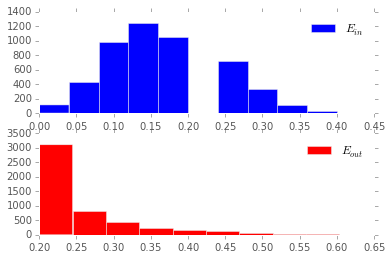

In [4]:
plt.figure()
plt.subplot(2,1,1)
plt.hist(best_E_in, color = "blue", label=r'$E_{in}$')
plt.legend()
plt.subplot(2,1,2)
plt.hist(best_E_out, color = "red" ,label = r'$E_{out}$')
plt.legend()
plt.savefig("p17")

In [5]:
print "average E_in:" , np.average(best_E_in)
print "average E_out:", np.average(best_E_out)

average E_in: 0.16913
average E_out: 0.25708944831
